# Demo: Phase transition

In [1]:
from fastsir import DiscreteSIR as sir
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## ER graph, simple contagion

In [246]:
#Network parameters
N = 20000
degree = 20
G = nx.random_regular_graph(degree,N)
max_degree = np.max([G.degree(n) for n in G])
edgelist = list(G.edges())

In [247]:
#contagion parameters
r = 0.01 #recovery probability
recovery_probability = r
alpha = 1.5
infection_func = lambda q,k: (1-(1-q**(1/alpha))**k)**alpha
q = 1.5*recovery_probability/degree

In [248]:
#simulation parameters
period = np.inf #simulate until no infected node
nb_sample = 100

### Simulation

In [249]:
Ilist = []
#define process object for each q
infection_probability = infection_func(q,np.arange(max_degree+1))
process = sir(edgelist,recovery_probability,infection_probability)
#get sample
for j in range(nb_sample):
    initial_infected_nodes = {np.random.randint(N)}
    process.infect_node_set(initial_infected_nodes)
    process.evolve(period,save_transmission_tree=False,save_macro_state=True) #we do not need to save these
    I = np.array(process.get_macro_state_vector())[:,2] #get number of infectious
    R = process.get_current_macro_state()[3]
    if R/N > 0.01:
        Ilist.append(I)
    process.reset()

(array([3., 2., 1., 5., 8., 5., 1., 1., 1., 4.]),
 array([2524. , 2621.5, 2719. , 2816.5, 2914. , 3011.5, 3109. , 3206.5,
        3304. , 3401.5, 3499. ]),
 <BarContainer object of 10 artists>)

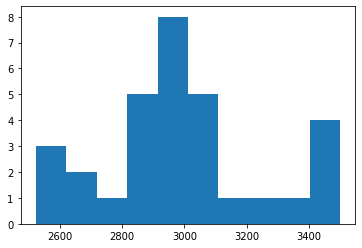

In [250]:
peaks = [max(Ilist[j]) for j in range(len(Ilist))]
plt.hist(peaks)

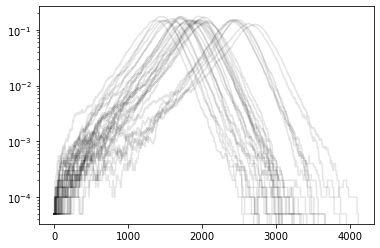

In [251]:
for j in range(len(Ilist)):
    # t = np.arange(2000,len(Ilist[j]))
    # plt.plot(np.log(Ilist[j][2000:])/t, color='k', alpha=0.3)
    plt.semilogy(Ilist[j]/N, color='k', alpha=0.1)